R&D for Synamedia
---
**Predict the goal in the given video**



```
Reading a video and extracting frames 
How to handle video files in Python
Predict the goal – A simple Solution

```



In [1]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images

Using TensorFlow backend.


In [2]:
# !pip install natsort
# import cv2
# import os
# import natsort
# def load_images_from_folder(folder):
#     images = []
#     count = 0
#     dirFiles = os.listdir(folder)
#     ll = natsort.natsorted(dirFiles,reverse=False)
#     for filename in ll:
#         #filename ="frame%d.jpg" % count;count+=1
#         img = cv2.imread(os.path.join(folder,filename))
#         if img is not None:
#           count+=1
#           #images.append(img)
#           #print(filename)
#     print(count)
#     return images

In [3]:
# load_images_from_folder("C:/Lnt/prafull/AI_ML/practice/ReadVideoURL/Soccer")

**Step – 1: Read the video, extract frames from it and save them as images**

In [4]:
#---------------------------------
# Not require this 
#---------------------------------
# count = 0
# videoFile = "file:///C:/Lnt/prafull/AI_ML/Office_rnd/Sport/video/testing_4.mp4"
# cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
# frameRate = cap.get(5) #frame rate
# x=1

# while(cap.isOpened()):
#     frameId = cap.get(1) #current frame number
#     ret, frame = cap.read()
#     if (ret != True):
#         break
#     if (frameId % math.floor(frameRate) == 0):
#         filename ="frame%d.jpg" % count;count+=1
#         cv2.imwrite(filename, frame)
        
# cap.release()
# cv2.destroyAllWindows()
# print ("Done!")


In [5]:
# Total number of frames
#count

In [6]:
# for i in range(count):
#   print("frame%d.jpg" % i)

Let us try to visualize an image (frame). We will first read the image using the imread() function of matplotlib, and then plot it using the imshow() function.

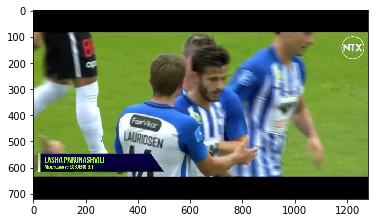

In [2]:
#!pip install imread
#from skimage.transform import imread
#img = imread('./Soccer/frame%d.jpg', as_grey =True)
img = plt.imread('./Soccer/frame%d.jpg' % 107)   # reading image using its name
plt.imshow(img)

Our task is to identify which image has following given objects

**Step – 2: Label a few images for training the model**



---

 we will treat it as a multi-class classification problem. The classes which I have defined are:

0 – Playing

1 – Goal

2 – Approach 

3 – Appriciate 

4 – None

We  have labelled all the frames with 0/1/2/3/4

In [3]:
#run for pretrained model
goal_defined = 5

In [4]:
df = pd.read_csv('file:///C:/Lnt/prafull/AI_ML/Office_rnd/Sport/video/demo_spcl.csv')
df.head() # printing first five rows of the file

,Image_ID,Class
0,frame0.jpg,4
1,frame1.jpg,4
2,frame2.jpg,4
3,frame3.jpg,4
4,frame4.jpg,4


In [5]:
df.shape

(1498, 2)

Remember, we need two things to train our model:

Training images, and their corresponding class.


Since there are three classes, we will one hot encode them using the to_categorical() function of keras.utils.

In [6]:
#If your df is big, you're probably not seeing the missing numbers. But you can use the fillna function to help
df = df.fillna(0)

In [7]:
# Next step is to read the images which we will do based on their names
X = [ ]     # creating an empty array
for img_name in df.Image_ID:
    img = plt.imread('./Soccer/' + img_name)
    #print(img_name) 
    X.append(img)  # storing each image in array X
    
X = np.array(X)    
print("done")

done


In [8]:
y = df.Class
df.head()

,Image_ID,Class
0,frame0.jpg,4
1,frame1.jpg,4
2,frame2.jpg,4
3,frame3.jpg,4
4,frame4.jpg,4


In [9]:
dummy_y = np_utils.to_categorical(y)    # one hot encoding Classes

In [10]:
y.shape

(1498,)

In [11]:
dummy_y.shape

(1498, 5)

We will be using a VGG16 pretrained model which takes an input image of shape (224 X 224 X 3). Since our images are in a different size, we need to reshape all of them. We will use the resize() function of skimage.transform to do this.

In [12]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

All the images have been reshaped to 224 X 224 X 3. 


In [13]:
from keras.applications.vgg16 import VGG16
model = VGG16()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

You can see that the model is huge.

You can also see that, by default, the model expects images as input with the size 224 x 224 pixels with 3 channels (e.g. color).

All the images have been reshaped to 224 X 224 X 3. But before passing any input to the model, we must preprocess it as per the model’s requirement. Otherwise, the model will not perform well enough. Use the preprocess_input() function of keras.applications.vgg16 to perform this step.

In [14]:
#run for pretrained model
from keras.applications.vgg16 import preprocess_input

In [15]:
X = preprocess_input(X, mode='tf')      # preprocessing the input data

In [17]:
X

array([[[[-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         ...,
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ]],

        [[-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         ...,
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ]],

        [[-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         ...,
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ]],

        ...,

        [[-1.        , -1.        , -1

We also need a validation set to check the performance of the model on unseen images. We will make use of the train_test_split() function of the sklearn.model_selection module to randomly divide images into training and validation set.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)    # preparing the validation set

In [17]:
X_train.shape

(1048, 224, 224, 3)

In [18]:
X_valid.shape

(450, 224, 224, 3)

In [19]:
y_train.shape

(1048, 5)

In [20]:
y_valid.shape

(450, 5)

**Step 3: Building the model**

we shall be using the VGG16 pretrained model for this task. 

In [21]:
#run for pretrained model
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [22]:
#run for pretrained model
# We will now load the VGG16 pretrained model and store it as base_model:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer

In [23]:
# We will make predictions using this model for X_train and X_valid, get the features, and then use those features to retrain the model.
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape


((1048, 7, 7, 512), (450, 7, 7, 512))

The shape of X_train and X_valid is (208, 7, 7, 512), (90, 7, 7, 512) respectively. In order to pass it to our neural network, we have to reshape it to 1-D.

In [24]:
X_train = X_train.reshape(X_train.shape[0], 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(X_valid.shape[0], 7*7*512)

In [25]:
X_train.shape, X_valid.shape

((1048, 25088), (450, 25088))

We will now preprocess the images and make them zero-centered which helps the model to converge faster.

In [26]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

Finally, we will build our model. This step can be divided into 3 sub-steps:

*   Building the model
*   Compiling the model
*   Training the model

In [27]:
# i. Building the model
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(goal_defined, activation='softmax'))    # output layer

#model.add(Dense(units=1024, activation='sigmoid')) # hidden layer

#model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
#model.add(Dropout(0.5))      # adding dropout
#model.add(Dense(units=512, activation='sigmoid'))    # hidden layer
#model.add(Dropout(0.5))      # adding dropout
#model.add(Dense(units=256, activation='sigmoid'))    # hidden layer
#model.add(Dropout(0.5))      # adding dropout
#model.add(Dense(goal_defined, activation='softmax'))    # output layer

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 5125      
Total params: 25,696,261
Trainable params: 25,696,261
Non-trainable params: 0
_________________________________________________________________


We have a hidden layer with 1,024 neurons and an output layer with 3 neurons (since we have 3 classes to predict). Now we will compile our model:

In [29]:
# ii. Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In the final step, we will fit the model and simultaneously also check its performance on the unseen images, i.e., validation images:

In [30]:
#iii. Training the model
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Instructions for updating:
Use tf.cast instead.
Train on 1048 samples, validate on 450 samples
Epoch 1/100
1048/1048 [==============================] - 18s 17ms/step - loss: 1.1514 - acc: 0.5677 - val_loss: 1.0961 - val_acc: 0.5733
Epoch 2/100
1048/1048 [==============================] - 15s 14ms/step - loss: 0.7019 - acc: 0.7300 - val_loss: 0.8420 - val_acc: 0.6622
Epoch 3/100
1048/1048 [==============================] - 15s 14ms/step - loss: 0.5119 - acc: 0.8158 - val_loss: 0.9049 - val_acc: 0.6200
Epoch 4/100
1048/1048 [==============================] - 15s 14ms/step - loss: 0.3838 - acc: 0.8922 - val_loss: 0.8307 - val_acc: 0.6667
Epoch 5/100
1048/1048 [==============================] - 15s 14ms/step - loss: 0.3077 - acc: 0.9141 - val_loss: 0.8117 - val_acc: 0.6600
Epoch 6/100
1048/1048 [==============================] - 15s 14ms/step - loss: 0.2403 - acc: 0.9523 - val_loss: 0.8945 - val_acc: 0.6533
Epoch 7/100
1048/1048 [==============================] - 19s 18ms/step - loss: 0.16

1048/1048 [==============================] - 15s 15ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.3014 - val_acc: 0.6756
Epoch 59/100
1048/1048 [==============================] - 15s 14ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.3177 - val_acc: 0.6756
Epoch 60/100
1048/1048 [==============================] - 15s 14ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 1.3200 - val_acc: 0.6756
Epoch 61/100
1048/1048 [==============================] - 15s 15ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 1.3214 - val_acc: 0.6756
Epoch 62/100
1048/1048 [==============================] - 15s 15ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 1.3425 - val_acc: 0.6733
Epoch 63/100
1048/1048 [==============================] - 15s 15ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 1.3267 - val_acc: 0.6756
Epoch 64/100
1048/1048 [==============================] - 15s 15ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 1.3238 - val_acc: 0.6756
Epoch 65/100
1048/1048 [=======================

We can see it is performing really well on the training as well as the validation images. We got an accuracy of around 85% on unseen images. And this is how we train a model on video data to get predictions for each frame.

In [31]:
# Accuracy on training data
scores = model.evaluate(train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1048/1048 [==============================] - 1s 1ms/step
acc: 100.00%


In [32]:
# Accuracy on validation data
scores = model.evaluate(X_valid, y_valid)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

450/450 [==============================] - 1s 1ms/step
acc: 67.11%


In [90]:
stored_model =  model
graph = tf.get_default_graph()

In [35]:
# serialize model to JSON
# from keras.models import model_from_json
# import json
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("goal_model.h5")
# print("Saved model to disk")

# [Try to save trained model]

In [364]:
# {  
#    "live_video_url":"http://192.168.43.16/static/final_match.mp4",
#    "final_highlights_url":"http://192.168.43.16/static/video_match_highlights.mp4",
#    "goal":[  
#       {  
#          "crop_video_url":"crop0",
#          "thumbnail":"thumbnail0",
#          "timestemp":"0"
#       },
#       {  
#          "crop_video_url":"crop1",
#          "thumbnail":"thumbnail1",
#          "timestemp":"60"
#       },
#       {  
#          "crop_video_url":"crop2",
#          "thumbnail":"thumbnail2",
#          "timestemp":"120"
#       },
#       {  
#          "crop_video_url":"crop3",
#          "thumbnail":"thumbnail3",
#          "timestemp":"180"
#       },
#       {  
#          "crop_video_url":"crop4",
#          "thumbnail":"thumbnail4",
#          "timestemp":"240"
#       }
#    ]
# }


In [365]:
# import cv2     # for capturing videos
# import math   # for mathematical operations
# import matplotlib.pyplot as plt    # for plotting the images
# %matplotlib inline
# import pandas as pd
# from keras.preprocessing import image   # for preprocessing the images
# import numpy as np    # for mathematical operations
# from keras.utils import np_utils
# from skimage.transform import resize   # for resizing images
# from keras.models import model_from_json
# import json
# from keras import backend as K
#K.clear_session()

In [366]:
# from keras.models import Sequential
# from keras.applications.vgg16 import VGG16
# from keras.layers import Dense, InputLayer, Dropout
# from keras.applications.vgg16 import preprocess_input

# # We will now load the VGG16 pretrained model and store it as base_model:
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer

In [89]:
#run for pretrained model
#load the save model
import tensorflow as tf
# def load_model():
#     global stored_model
#     stored_model = Sequential()
#     stored_model.add(InputLayer((7*7*512,)))    # input layer
#     stored_model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
#     stored_model.add(Dense(5, activation='softmax'))    # output layer
#     global graph
#     graph = tf.get_default_graph()
#     stored_model.load_weights("./model/goal_model.h5")
    #stored_model._make_predict_function()

In [54]:
#load_model()

**Now, we will try to indentify the given objectives in a new video.**

In [72]:
def identifyGoal(frame): 
    # import the Image_ID for creating test_image array and then reshape them
    test_image = []
    test_image.append(frame)
    test_img = np.array(test_image) 
    # resize all test_image array images before applying model
    test_image = []
    for i in range(0,test_img.shape[0]):
        a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
        test_image.append(a)
    test_image = np.array(test_image)
    # preprocessing the images
    test_image = preprocess_input(test_image, mode='tf')
    # extracting features from the images using pretrained model
    test_image = base_model.predict(test_image)
    # converting the images to 1-D form
    size = test_image.shape[0]
    test_image = test_image.reshape(size, 7*7*512)
    # zero centered images
    test_image = test_image/test_image.max()
    # identify the frame by using trained model
    with graph.as_default():
        predictions = stored_model.predict_classes(test_image)
    return predictions

In [73]:
def delete(temp_frames):
    del temp_frames[0]
    return temp_frames

**Developer: Prafulla Malviya**

# For Getting IPAddress

In [204]:
# Python Program to Get IP Address 
import socket    
hostname = socket.gethostname()    
ipAdd = socket.gethostbyname(hostname) 
port = 5000
Header = "http"
#Header = "http"
IPAddr = Header+"://"+ipAdd+":"+str(port)
print("Your Computer Name is:" + hostname)    
print("Your Computer IP Address is:" + IPAddr)

Your Computer Name is:PRMALVIY-MNFSH
Your Computer IP Address is:http://10.142.238.10:5000


In [108]:
def createVideo(frames,frameRate,width,height,count):
    clips_video = cv2.VideoWriter("./static/clip_"+str(count)+"_"+video_name , 0, frameRate, (width,height))
    for image in frames:
            clips_video.write(image)
                          
    clips_video.release()
    return IPAddr+"/static/clip_"+str(count)+"_"+video_name 

In [109]:
# import pafy 
# url = 'https://youtu.be/bKOTKHtbM54'
# vPafy = pafy.new(url)
# play = vPafy.getbest(preftype="webm")

# #start the video
# cap = cv2.VideoCapture(play.url)

Reset the JSON before any new stream start

In [215]:
# load the video and pass to identity the goal by using the trainned model
from time import sleep
import pafy 
video_name = 'final_match.mp4'
live_vid_url = IPAddr + "/static/" + video_name
final_vid_highlights_url = ""
goal_list = []
goal_dict = {'live_video_url': live_vid_url, 'final_highlights_url': final_vid_highlights_url, 'goal': goal_list}

def startBroadcast():
    second = 10  # for getting clip = [T-second+T+T+second]
    after_second = 10
    #for other streaming----------------------------------------
    videoFile = "file:///C:/Lnt/prafull/AI_ML/practice/ReadVideoURL/static/" + video_name
    #for YouTube streaming--------------------------------------
#     videoFile = "https://youtu.be/8uY4Ke-L9xg"
#     vPafy = pafy.new(videoFile)
#     play = vPafy.getbest(preftype="webm")
#     videoFile =  play.url
    # ----------------------------------------------------
    count = 0
    goal_count = 0
    time = 0
    cap = cv2.VideoCapture(videoFile)
    width = math.floor(cap.get(3))
    height = math.floor(cap.get(4))
    frameRate = cap.get(5)  # frame 
    frame_length = (math.floor(frameRate)) * second
    after_frame_length = (math.floor(frameRate) * after_second)
    print(width, height, frameRate)
    # -----------------------------------------------------
    video = cv2.VideoWriter("./static/highlights_" + video_name, 0, frameRate, (width, height))
    # x=1
    isGoalDetected = False
    nextFramesCount = 0
    temp_frames = []
    clips_frames = []
    first_frame = None
    while cap.isOpened():
        crop_vid_url = ''
        timestemp = 0
        frameId = cap.get(1)  # current frame number
        ret, frame = cap.read()
        # height, width, layers = frame.shape
   
        if ret:
            temp_frames.append(frame)

        if isGoalDetected:
            # print ('g2',filename, goal)
            del temp_frames[:]
            if ret:
                video.write(frame)
                clips_frames.append(frame)
                nextFramesCount += 1

            if ret is not True or nextFramesCount > after_frame_length:
                goal_count += 1
                crop_vid_url = createVideo(clips_frames, frameRate, width, height, goal_count)
                timestemp = time
                nextFramesCount = 0
                isGoalDetected = False
                goal_info = {'crop_video_url': crop_vid_url, 'thumbnail': thumbnail, 'timestemp': timestemp}
                goal_list.append(goal_info)
                thumbnail = ''
                del clips_frames[:]
        elif len(temp_frames) > frame_length:
            temp_frames = delete(temp_frames)

        if ret is not True:
            break

        if frameId % math.floor(frameRate) == 0:
            filename = "frame_%d.jpg" % count
            count += 1
            goal = identifyGoal(frame)
            print(filename, goal)
            
            # for testing
            if first_frame is None:
                cv2.imwrite("./static/" + filename, frame)
                first_frame =  IPAddr + "/static/" + filename
            # for testing
            
            if isGoalDetected is not True and goal == 1:
                time = count - 1
                cv2.imwrite("./static/" + filename, frame)
                thumbnail = IPAddr + "/static/" + filename
                isGoalDetected = True
                for image in temp_frames:
                    # print ('recorded', goal, len(temp_frames))
                    video.write(image)
                    clips_frames.append(image)
            # cv2.imwrite(filename, frame)


    sleep(0.2) # Time in seconds.
    video.release()
    sleep(0.2) # Time in seconds.
    # --------------------------
    final_vid_highlights_url = IPAddr+"/static/highlights_"+video_name
    goal_dict['live_video_url'] = live_vid_url
    goal_dict['final_highlights_url'] = final_vid_highlights_url
    #--for testing
    goal_info = {'crop_video_url': final_vid_highlights_url, 'thumbnail': first_frame, 'timestemp': 99999}
    goal_list.append(goal_info)
    print (first_frame)
    #--end of testing
    goal_dict['goal'] = goal_list
    # print(dict)
    goal_dict_json = json.dumps(goal_dict)
    # loaded_r = json.loads(r)
    print('______________________________________________________________________')
    print(goal_dict_json)
    cap.release()
    cv2.destroyAllWindows()
    print("Done!")


In [111]:
# cap.release()
# cv2.destroyAllWindows()

In [112]:
#For testing
#startBroadcast()

# [Server]

In [113]:
# !pip install pyopenssl
# !pip install -U flask-cors
# !pip install flask

In [114]:
from flask import Flask, request, jsonify, Response
from flask_cors import CORS
import json

In [115]:
app = Flask(__name__)

In [116]:
CORS(app)
#cors = CORS(app, resources={r"/api/*": {"origins": "*"}})

In [117]:
@app.route("/getVideoJson",methods=['GET'])
def getVideoJson():
    goal_dict_json = json.dumps(goal_dict)
    return str(goal_dict_json)

In [118]:
@app.route("/startML",methods=['GET'])
def startML():
    startBroadcast()

In [119]:
# import sys
# sys.setrecursionlimit(1000)

In [120]:
# from flask import request
# def shutdown_server():
#     func = request.environ.get('werkzeug.server.shutdown')
#     if func is None:
#         raise RuntimeError('Not running with the Werkzeug Server')
#     func()

# @app.route('/shutdown', methods=['POST'])
# def shutdown():
#     shutdown_server()
#     return 'Server shutting down...'

# [Start server]

In [ ]:
#start server for Http
if __name__ == '__main__':
    app.run(host='0.0.0.0',debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)


1280 720 25.0
frame_0.jpg [3]
frame_1.jpg [3]
frame_2.jpg [3]
frame_3.jpg [3]
frame_4.jpg [3]
frame_5.jpg [0]
frame_6.jpg [0]
frame_7.jpg [0]
frame_8.jpg [0]
frame_9.jpg [0]
frame_10.jpg [0]
frame_11.jpg [0]
frame_12.jpg [0]
frame_13.jpg [0]
frame_14.jpg [3]
frame_15.jpg [3]
frame_16.jpg [3]
frame_17.jpg [3]
frame_18.jpg [3]
frame_19.jpg [0]
frame_20.jpg [0]
frame_21.jpg [0]
frame_22.jpg [1]
frame_23.jpg [0]
frame_24.jpg [0]
frame_25.jpg [0]
frame_26.jpg [0]
frame_27.jpg [0]
frame_28.jpg [0]
frame_29.jpg [4]
frame_30.jpg [3]
frame_31.jpg [3]
frame_32.jpg [3]
frame_33.jpg [3]
frame_34.jpg [3]
frame_35.jpg [3]
frame_36.jpg [3]
frame_37.jpg [3]
frame_38.jpg [3]
frame_39.jpg [3]
frame_40.jpg [0]
frame_41.jpg [0]
frame_42.jpg [0]
frame_43.jpg [4]
frame_44.jpg [4]
frame_45.jpg [0]
frame_46.jpg [0]
frame_47.jpg [0]
frame_48.jpg [0]
frame_49.jpg [0]
frame_50.jpg [0]
frame_51.jpg [0]
frame_52.jpg [0]
frame_53.jpg [0]
frame_54.jpg [0]
frame_55.jpg [0]
frame_56.jpg [0]
frame_57.jpg [0]
frame_58.j

[2019-05-22 14:01:04,297] ERROR in app: Exception on /startML [GET]
Traceback (most recent call last):
  File "c:\lnt\prafull\ai_ml\practice\readvideourl\venv\lib\site-packages\flask\app.py", line 2311, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\lnt\prafull\ai_ml\practice\readvideourl\venv\lib\site-packages\flask\app.py", line 1835, in full_dispatch_request
    return self.finalize_request(rv)
  File "c:\lnt\prafull\ai_ml\practice\readvideourl\venv\lib\site-packages\flask\app.py", line 1850, in finalize_request
    response = self.make_response(rv)
  File "c:\lnt\prafull\ai_ml\practice\readvideourl\venv\lib\site-packages\flask\app.py", line 1976, in make_response
    'The view function did not return a valid response. The'
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
127.0.0.1 - - [22/May/2019 14:01:04] "GET /startML HTTP/1.1" 500 -


http://10.142.238.10:5000/static/frame_0.jpg
______________________________________________________________________
{"live_video_url": "http://10.142.238.10:5000/static/final_match.mp4", "final_highlights_url": "http://10.142.238.10:5000/static/highlights_final_match.mp4", "goal": [{"crop_video_url": "http://10.142.238.10:5000/static/clip_1_final_match.mp4", "thumbnail": "http://10.142.238.10:5000/static/frame_22.jpg", "timestemp": 22}, {"crop_video_url": "http://10.142.238.10:5000/static/clip_2_final_match.mp4", "thumbnail": "http://10.142.238.10:5000/static/frame_63.jpg", "timestemp": 63}, {"crop_video_url": "http://10.142.238.10:5000/static/clip_3_final_match.mp4", "thumbnail": "http://10.142.238.10:5000/static/frame_98.jpg", "timestemp": 98}, {"crop_video_url": "http://10.142.238.10:5000/static/clip_4_final_match.mp4", "thumbnail": "http://10.142.238.10:5000/static/frame_110.jpg", "timestemp": 110}, {"crop_video_url": "http://10.142.238.10:5000/static/highlights_final_match.mp4", "

10.142.236.184 - - [22/May/2019 14:34:36] "GET /static/final_match.mp4 HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:35:02] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:35:07] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:35:11] "GET /static/clip_1_final_match.mp4 HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:35:11] "GET /static/clip_1_final_match.mp4 HTTP/1.1" 206 -
10.142.236.184 - - [22/May/2019 14:35:11] "GET /static/clip_1_final_match.mp4 HTTP/1.1" 206 -
10.142.236.184 - - [22/May/2019 14:35:12] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:35:17] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:35:22] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:35:27] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:35:32] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:35:37] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 

10.142.236.184 - - [22/May/2019 14:42:27] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:42:32] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:42:37] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:42:42] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:42:47] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:43:05] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:43:06] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:43:07] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:43:12] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:43:17] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:43:22] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:43:27] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:43:32] "GET /getVideoJson HTTP/1.1" 200 -

10.142.236.184 - - [22/May/2019 14:50:32] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:50:37] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:50:42] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:50:47] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:50:52] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:50:57] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:51:02] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:51:07] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:51:12] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:51:17] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:51:22] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:51:27] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:51:32] "GET /getVideoJson HTTP/1.1" 200 -

10.142.236.184 - - [22/May/2019 14:58:37] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:58:42] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:58:47] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:58:52] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:58:57] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:59:02] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:59:07] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:59:12] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:59:17] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:59:22] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:59:27] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:59:32] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 14:59:37] "GET /getVideoJson HTTP/1.1" 200 -

10.142.236.184 - - [22/May/2019 15:06:37] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:06:42] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:06:47] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:06:52] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:06:57] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:07:02] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:07:07] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:07:12] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:07:17] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:07:22] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:07:27] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:07:32] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:07:37] "GET /getVideoJson HTTP/1.1" 200 -

10.142.236.184 - - [22/May/2019 15:14:37] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:14:42] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:14:47] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:14:52] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:14:58] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:15:02] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:15:07] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:15:12] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:15:17] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:15:22] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:15:27] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:15:32] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:15:38] "GET /getVideoJson HTTP/1.1" 200 -

10.142.236.184 - - [22/May/2019 15:22:38] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:22:43] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:22:48] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:22:53] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:22:58] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:23:03] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:23:08] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:23:13] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:23:18] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:23:23] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:23:28] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:23:33] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:23:38] "GET /getVideoJson HTTP/1.1" 200 -

10.142.236.184 - - [22/May/2019 15:30:38] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:30:43] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:30:48] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:30:53] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:30:58] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:31:03] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:31:08] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:31:13] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:31:18] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:31:23] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:31:28] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:31:33] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:31:38] "GET /getVideoJson HTTP/1.1" 200 -

10.142.236.184 - - [22/May/2019 15:38:38] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:38:43] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:38:48] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:38:53] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:38:58] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:39:03] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:39:08] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:39:13] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:39:18] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:39:23] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:39:28] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:39:33] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:39:38] "GET /getVideoJson HTTP/1.1" 200 -

10.142.236.184 - - [22/May/2019 15:46:38] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:46:43] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:46:48] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:46:53] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:46:58] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:47:03] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:47:08] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:47:13] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:47:18] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:47:23] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:47:28] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:47:33] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:47:38] "GET /getVideoJson HTTP/1.1" 200 -

10.142.236.184 - - [22/May/2019 15:54:38] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:54:43] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:54:48] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:54:53] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:54:58] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:55:03] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:55:08] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:55:13] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:55:18] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:55:23] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:55:28] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:55:33] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 15:55:38] "GET /getVideoJson HTTP/1.1" 200 -

10.142.236.184 - - [22/May/2019 16:02:38] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 16:02:43] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 16:02:48] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 16:02:53] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 16:02:58] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 16:03:03] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 16:03:08] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 16:03:13] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 16:03:18] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 16:03:23] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 16:03:28] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 16:03:33] "GET /getVideoJson HTTP/1.1" 200 -
10.142.236.184 - - [22/May/2019 16:03:38] "GET /getVideoJson HTTP/1.1" 200 -

In [183]:
#start server for Https
# if __name__ == '__main__':
#     app.run(host='0.0.0.0',debug=False, ssl_context='adhoc', threaded=True)

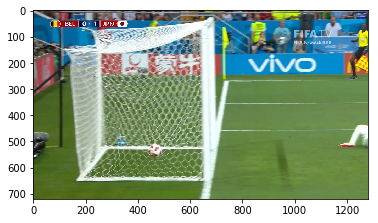

In [36]:
#check frame who saved in static
img = plt.imread('./static/frame_22.jpg')   # reading image using its name
plt.imshow(img)

How to create JSON from dictionary

In [44]:
#dummy JSON format
live_vid_url = "http://"+IPAddr+"/static/final_match.mp4"
final_vid_highlights_url = "http://"+IPAddr+"/static/video_match_highlights.mp4" 
goal = []
for i in range(0,5):
    crop_vid_url = 'crop'+str(i)
    thumbnail = 'thumbnail'+str(i)
    timestemp =  str(i*60)
    goal_info = {'crop_video_url': crop_vid_url, 'thumbnail': thumbnail, 'timestemp': timestemp}
    goal.append(goal_info)
    
dict = {'live_video_url': live_vid_url, 'final_highlights_url': final_vid_highlights_url, 'goal':  goal}
#print(dict)
r = json.dumps(dict)
#loaded_r = json.loads(r)
print(r)

{"live_video_url": "http://10.142.237.212:5000/static/final_match.mp4", "final_highlights_url": "http://10.142.237.212:5000/static/video_match_highlights.mp4", "goal": [{"crop_video_url": "crop0", "thumbnail": "thumbnail0", "timestemp": "0"}, {"crop_video_url": "crop1", "thumbnail": "thumbnail1", "timestemp": "60"}, {"crop_video_url": "crop2", "thumbnail": "thumbnail2", "timestemp": "120"}, {"crop_video_url": "crop3", "thumbnail": "thumbnail3", "timestemp": "180"}, {"crop_video_url": "crop4", "thumbnail": "thumbnail4", "timestemp": "240"}]}


In [40]:
#shutdown_server()

In [193]:
#for testing
# import sched, time
# s = sched.scheduler(time.time, time.sleep)

In [195]:
# def print_time(a='default'): 
#     print("From print_time", time.time(), a)

In [196]:
# def print_some_times():
#     s.enter(10, 1, print_time)
#     s.enter(5, 2, print_time, argument=('positional',))
#     s.enter(5, 1, print_time, kwargs={'a': 'keyword'})
#     s.run()

In [197]:
# @app.route("/demoServer8",methods=['GET'])
# def demoServer8():
#     print_some_times()

In [ ]:
# @app.route("/demoServer6",methods=['GET'])
# def demoServer6():
#     timestemp = 54536
#     demo_count = demo_count + 1
#     if demo_count == 1:
#         crop_vid_url = "http://10.142.237.105:5000/static/clip_1_final_match.mp4"
#         thumbnail = "http://10.142.237.105:5000/static/frame_22.jpg"
#         timestemp = 22
#     elif demo_count == 2:
#         crop_vid_url = "http://10.142.237.105:5000/static/clip_2_final_match.mp4"
#         thumbnail = "http://10.142.237.105:5000/static/frame_63.jpg"
#         timestemp = 63
#     elif demo_count == 3:
#         crop_vid_url = "http://10.142.237.105:5000/static/clip_3_final_match.mp4"
#         thumbnail = "http://10.142.237.105:5000/static/frame_98.jpg"
#         timestemp = 98
#     elif demo_count == 4:
#         crop_vid_url ="http://10.142.237.105:5000/static/clip_4_final_match.mp4"
#         thumbnail = "http://10.142.237.105:5000/static/frame_110.jpg"
#         timestemp = 110
#     elif demo_count == 5:
#         crop_vid_url = "http://10.142.237.105:5000/static/highlights_final_match.mp4"
#         thumbnail = "http://10.142.237.105:5000/static/frame_0.jpg"
#         timestemp = 99999
#     print (demo_count)
           
#     if ( timestemp != 54536):  
#         goal_info = {'crop_video_url': crop_vid_url, 'thumbnail': thumbnail, 'timestemp': timestemp}
#         goal_list.append(goal_info)
    

# print (timestemp)

In [ ]:
demo_count = 0 
crop_vid_url = None
thumbnail = ''
timestemp = 54536

In [202]:
@app.route("/demoTestServer",methods=['GET'])
def demoTestServer():
    crop_vid_url = IPAddr+"/static/clip_1_final_match.mp4"
    thumbnail = IPAddr+"/static/frame_22.jpg"
    timestemp = 22
    goal_info = {'crop_video_url': crop_vid_url, 'thumbnail': thumbnail, 'timestemp': timestemp}
    goal_list.append(goal_info)
    #------------------------------------
    crop_vid_url = IPAddr+"/static/clip_2_final_match.mp4"
    thumbnail = IPAddr+"/static/frame_63.jpg"
    timestemp = 63
    goal_info = {'crop_video_url': crop_vid_url, 'thumbnail': thumbnail, 'timestemp': timestemp}
    goal_list.append(goal_info)
    #------------------------------------
    crop_vid_url = IPAddr+"/static/clip_3_final_match.mp4"
    thumbnail = IPAddr+"/static/frame_98.jpg"
    timestemp = 98
    goal_info = {'crop_video_url': crop_vid_url, 'thumbnail': thumbnail, 'timestemp': timestemp}
    goal_list.append(goal_info)
    #------------------------------------
    crop_vid_url = IPAddr+"/static/clip_4_final_match.mp4"
    thumbnail = IPAddr+"/static/frame_110.jpg"
    timestemp = 110
    goal_info = {'crop_video_url': crop_vid_url, 'thumbnail': thumbnail, 'timestemp': timestemp}
    goal_list.append(goal_info)
    #------------------------------------
    crop_vid_url = IPAddr+"/static/highlights_final_match.mp4"
    thumbnail = IPAddr+"/static/frame_0.jpg"
    timestemp = 99999
    goal_info = {'crop_video_url': crop_vid_url, 'thumbnail': thumbnail, 'timestemp': timestemp}
    goal_list.append(goal_info)
    #------------------------------------ 
    

print (timestemp)

54536
